# Forecasting


In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [50]:
dataset = pd.read_csv("merged_data.csv", index_col=0)
dataset["date"]= pd.to_datetime(dataset["date"])
df = dataset[dataset["date"].dt.year < 2023]

In [53]:
dataset = pd.read_csv("retard_ferie_vacation.csv")
dataset["date"]= pd.to_datetime(dataset["date"])
df = dataset[dataset["date"].dt.year < 2023]
dataset

,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,annee,mois,nombre_jour_ferie,jours_vacances,total_jours,ratio_vacances
0,2018-01-01,National,BORDEAUX ST JEAN,PARIS MONTPARNASSE,141,870,5,0.0,289,11.247809,...,10.924370,15.966387,5.042017,0.840336,2018,1,1.0,24.0,31.0,0.774194
1,2018-01-01,National,LA ROCHELLE VILLE,PARIS MONTPARNASSE,165,222,0,0.0,8,2.875000,...,38.461538,11.538462,3.846154,0.000000,2018,1,1.0,24.0,31.0,0.774194
2,2018-01-01,National,PARIS MONTPARNASSE,QUIMPER,220,248,1,0.0,37,9.501351,...,15.384615,19.230769,0.000000,0.000000,2018,1,1.0,24.0,31.0,0.774194
3,2018-01-01,National,PARIS MONTPARNASSE,ST MALO,156,102,0,0.0,12,19.912500,...,7.692308,15.384615,7.692308,0.000000,2018,1,1.0,24.0,31.0,0.774194
4,2018-01-01,National,PARIS MONTPARNASSE,ST PIERRE DES CORPS,61,391,2,0.0,61,7.796995,...,9.090909,21.212121,6.060606,0.000000,2018,1,1.0,24.0,31.0,0.774194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2023-06-01,National,STRASBOURG,PARIS EST,114,492,2,0.0,273,11.989927,...,55.238095,18.095238,7.619048,5.714286,2023,6,0.0,0.0,0.0,0.000000
8150,2023-06-01,National,TOULOUSE MATABIAU,PARIS MONTPARNASSE,273,215,0,0.0,24,28.730556,...,8.333333,19.444444,8.333333,16.666667,2023,6,0.0,0.0,0.0,0.000000
8151,2023-06-01,National,TOURS,PARIS MONTPARNASSE,78,192,1,0.0,20,31.281667,...,28.571429,21.428571,3.571429,10.714286,2023,6,0.0,0.0,0.0,0.000000
8152,2023-06-01,National,VALENCE ALIXAN TGV,PARIS LYON,133,440,2,0.0,347,13.517051,...,27.586207,7.758621,7.758621,10.344828,2023,6,0.0,0.0,0.0,0.000000


In [ ]:
df.columns

Index(['date', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'nb_train_depart_retard',
       'retard_moyen_depart', 'retard_moyen_tous_trains_depart',
       'nb_train_retard_arrivee', 'retard_moyen_arrivee',
       'retard_moyen_tous_trains_arrivee', 'nb_train_retard_sup_15',
       'retard_moyen_trains_retard_sup15', 'nb_train_retard_sup_30',
       'nb_train_retard_sup_60', 'prct_cause_externe', 'prct_cause_infra',
       'prct_cause_gestion_trafic', 'prct_cause_materiel_roulant',
       'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs',
       'Total Voyageurs annuel', 'Total Voyageurs + non voyageurs annuel',
       'Nombre Accidents', 'Nombre de jours d'absences', 'TF mensuel',
       'TF annuel glissant 12 mois', 'TG mensuel',
       'TG annuel glissant 12 mois'],
      dtype='object')

In [ ]:
ddf['retard_moyen_tous_trains_arrivee'].min()

-40.10925926

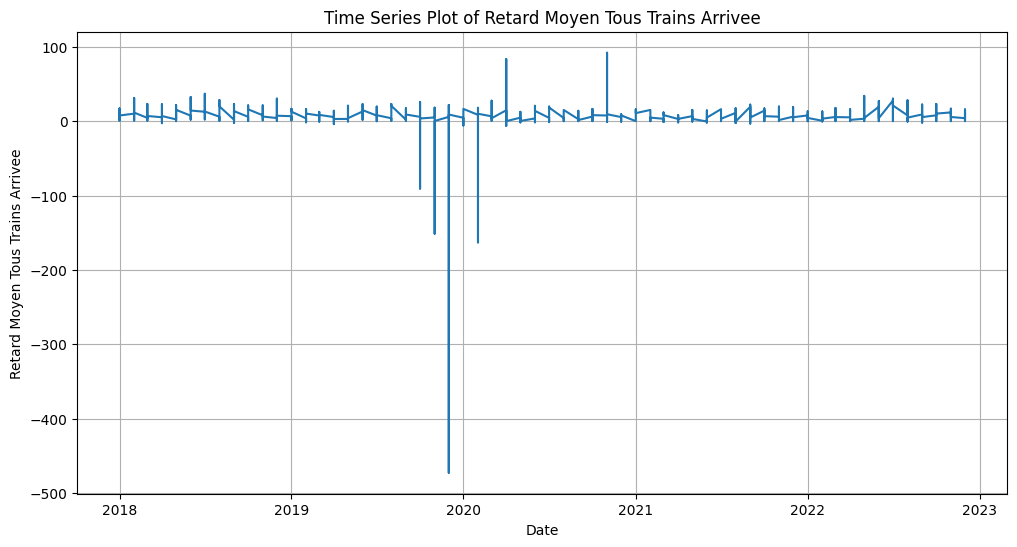

In [5]:
# Assuming 'date' is your date column and 'retard_moyen_tous_trains_arrivee' is the variable to forecast
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['retard_moyen_tous_trains_arrivee'])
plt.title('Time Series Plot of Retard Moyen Tous Trains Arrivee')
plt.xlabel('Date')
plt.ylabel('Retard Moyen Tous Trains Arrivee')
plt.grid(True)
plt.show()


In [8]:

# Prepare the data for Prophet
fd = fd.rename(columns={"date": "ds", "retard_moyen_arrivee": "y"})

In [9]:

# Define your 'subset_df' as the most recurrent trajet
fd = subset_df


# Create a column 'ds' with a datetime format
fd['ds'] = pd.to_datetime(fd['ds'])

# Keep only the rows before 2023 for training
train_df = fd[fd['ds'].dt.year < 2023]

# Create and fit the Prophet model with the training data
model = Prophet()
model.fit(train_df)

# Create a dataframe with future dates for forecasting (only for 2023)
future = model.make_future_dataframe(periods=365)  # Assuming you want to forecast for the entire year of 2023

# Make predictions for the future dates
forecast = model.predict(future)

# Filter the forecast for 2023
forecast_2023 = forecast[forecast['ds'].dt.year == 2023]

# Plot the forecast for 2023
fig = model.plot(forecast_2023)

# Customize the plot
plt.title("Train Arrival Delay Forecast for 2023")
plt.xlabel("Date")
plt.ylabel("Average Delay (minutes)")

# To show the forecasted data points, you can overlay them on the original data
plt.scatter(fd['ds'], fd['y'], color='red', label='Original Data', zorder=5)
plt.scatter(forecast_2023['ds'], forecast_2023['yhat'], color='green', label='Forecasted Data', zorder=5)

# Show the plot
plt.legend(loc='best')
plt.show()


NameError: name 'subset_df' is not defined

In [ ]:
subset_df.columns

Index(['ds', 'service', 'gare_depart', 'gare_arrivee', 'duree_moyenne',
       'nb_train_prevu', 'nb_annulation', 'commentaire_annulation',
       'nb_train_depart_retard', 'retard_moyen_depart',
       'retard_moyen_tous_trains_depart', 'commentaire_retards_depart',
       'nb_train_retard_arrivee', 'y', 'retard_moyen_tous_trains_arrivee',
       'commentaires_retard_arrivee', 'nb_train_retard_sup_15',
       'retard_moyen_trains_retard_sup15', 'nb_train_retard_sup_30',
       'nb_train_retard_sup_60', 'prct_cause_externe', 'prct_cause_infra',
       'prct_cause_gestion_trafic', 'prct_cause_materiel_roulant',
       'prct_cause_gestion_gare', 'prct_cause_prise_en_charge_voyageurs',
       'annee', 'mois', 'nombre_jour_ferie', 'jours_vacances', 'total_jours',
       'ratio_vacances'],
      dtype='object')

In [10]:
# Define your 'subset_df' as the most recurrent trajet
fd = subset_df
# Prepare the data for Prophet
fd = fd.rename(columns={"date": "ds", "retard_moyen_arrivee": "y"})

NameError: name 'subset_df' is not defined

19:10:04 - cmdstanpy - INFO - Chain [1] start processing
19:10:04 - cmdstanpy - INFO - Chain [1] done processing


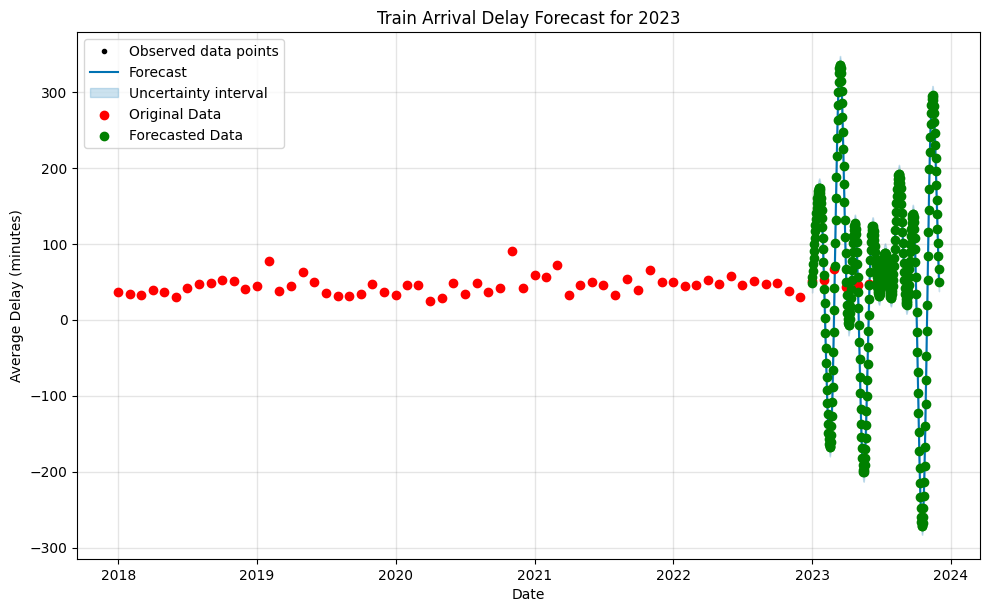

,ds,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,annee,mois,nombre_jour_ferie,jours_vacances,total_jours,ratio_vacances
115,2018-01-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,402,0,0.0,117,6.625641,...,8.571429,22.857143,0.000000,2.857143,2018,1,1.0,24.0,31.0,0.774194
171,2018-02-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,356,0,0.0,143,7.292308,...,2.500000,17.500000,2.500000,0.000000,2018,2,0.0,34.0,28.0,1.214286
307,2018-03-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,396,8,0.0,148,7.855518,...,11.111111,30.555556,5.555556,2.777778,2018,3,0.0,17.0,31.0,0.548387
435,2018-04-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,414,108,0.0,128,8.807161,...,21.739130,26.086957,4.347826,0.000000,2018,4,1.0,44.0,30.0,1.466667
556,2018-05-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,410,60,0.0,47,24.701064,...,15.384615,15.384615,7.692308,1.923077,2018,5,4.0,7.0,31.0,0.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7623,2023-02-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,380,12,0.0,228,8.125219,...,15.625000,15.625000,9.375000,6.250000,2023,2,0.0,45.0,28.0,1.607143
7673,2023-03-01,National,AIX EN PROVENCE TGV,PARIS LYON,189,436,71,0.0,234,7.905627,...,10.869565,4.347826,4.347826,4.347826,2023,3,0.0,6.0,31.0,0.193548
7868,2023-04-01,National,AIX EN PROVENCE TGV,PARIS LYON,189,455,3,0.0,314,8.444798,...,8.333333,18.333333,16.666667,15.000000,2023,4,1.0,42.0,30.0,1.400000
7913,2023-05-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,469,5,0.0,302,7.664735,...,20.000000,22.857143,8.571429,14.285714,2023,5,4.0,26.0,31.0,0.838710


In [ ]:


# Create a column 'ds' with a datetime format
fd['ds'] = pd.to_datetime(fd['ds'])

# Keep only the rows before 2023 for training
train_df = fd[fd['ds'].dt.year < 2023]

# Create and fit the Prophet model with the training data
model = Prophet()
model.fit(train_df)

# Create a dataframe with future dates for forecasting (only for 2023)
future = model.make_future_dataframe(periods=365)  # Assuming you want to forecast for the entire year of 2023

# Make predictions for the future dates
forecast = model.predict(future)

# Filter the forecast for 2023
forecast_2023 = forecast[forecast['ds'].dt.year == 2023]

# Plot the forecast for 2023
fig = model.plot(forecast_2023)

# Customize the plot
plt.title("Train Arrival Delay Forecast for 2023")
plt.xlabel("Date")
plt.ylabel("Average Delay (minutes)")

# To show the forecasted data points, you can overlay them on the original data
plt.scatter(fd['ds'], fd['y'], color='red', label='Original Data', zorder=5)
plt.scatter(forecast_2023['ds'], forecast_2023['yhat'], color='green', label='Forecasted Data', zorder=5)

# Show the plot
plt.legend(loc='best')
plt.show()
fd

In [12]:
subsett_df = subset_df[["date", 
                                    "gare_depart", 
                                    "gare_arrivee", 
                                    "nb_train_prevu",
                                    "retard_moyen_arrivee",
                                    ]]
subsett_df

,date,gare_depart,gare_arrivee,nb_train_prevu,retard_moyen_arrivee
115,2018-01-01,AIX EN PROVENCE TGV,PARIS LYON,402,35.974324
171,2018-02-01,AIX EN PROVENCE TGV,PARIS LYON,356,33.835833
307,2018-03-01,AIX EN PROVENCE TGV,PARIS LYON,396,32.435897
435,2018-04-01,AIX EN PROVENCE TGV,PARIS LYON,414,38.792949
556,2018-05-01,AIX EN PROVENCE TGV,PARIS LYON,410,37.066667
...,...,...,...,...,...
7623,2023-02-01,AIX EN PROVENCE TGV,PARIS LYON,380,51.911458
7673,2023-03-01,AIX EN PROVENCE TGV,PARIS LYON,436,66.546014
7868,2023-04-01,AIX EN PROVENCE TGV,PARIS LYON,455,43.651667
7913,2023-05-01,AIX EN PROVENCE TGV,PARIS LYON,469,45.375714


In [111]:
df=dataset
# Group the data by the combination of 'gare_depart' and 'gare_arrivee'
trajet_counts = df.groupby(['gare_depart', 'gare_arrivee']).size().reset_index(name='count')

# Sort the trajets by frequency in descending order
most_recurrent_trajet = trajet_counts.sort_values(by='count', ascending=False).iloc[0]

# Display the most recurrent trajet
print("The most recurrent trajet is from", most_recurrent_trajet['gare_depart'], "to", most_recurrent_trajet['gare_arrivee'])
print("Frequency:", most_recurrent_trajet['count'])

most_recurrent_depart = most_recurrent_trajet['gare_depart']
most_recurrent_arrivee = most_recurrent_trajet['gare_arrivee']

# Filter your original DataFrame based on the most recurrent trajet
subset_df = df[(df['gare_depart'] == most_recurrent_depart) & (df['gare_arrivee'] == most_recurrent_arrivee)]
subset_df

The most recurrent trajet is from AIX EN PROVENCE TGV to PARIS LYON
Frequency: 66


,date,service,gare_depart,gare_arrivee,duree_moyenne,nb_train_prevu,nb_annulation,commentaire_annulation,nb_train_depart_retard,retard_moyen_depart,...,prct_cause_gestion_trafic,prct_cause_materiel_roulant,prct_cause_gestion_gare,prct_cause_prise_en_charge_voyageurs,annee,mois,nombre_jour_ferie,jours_vacances,total_jours,ratio_vacances
115,2018-01-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,402,0,0.0,117,6.625641,...,8.571429,22.857143,0.000000,2.857143,2018,1,1.0,24.0,31.0,0.774194
171,2018-02-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,356,0,0.0,143,7.292308,...,2.500000,17.500000,2.500000,0.000000,2018,2,0.0,34.0,28.0,1.214286
307,2018-03-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,396,8,0.0,148,7.855518,...,11.111111,30.555556,5.555556,2.777778,2018,3,0.0,17.0,31.0,0.548387
435,2018-04-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,414,108,0.0,128,8.807161,...,21.739130,26.086957,4.347826,0.000000,2018,4,1.0,44.0,30.0,1.466667
556,2018-05-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,410,60,0.0,47,24.701064,...,15.384615,15.384615,7.692308,1.923077,2018,5,4.0,7.0,31.0,0.225806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7623,2023-02-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,380,12,0.0,228,8.125219,...,15.625000,15.625000,9.375000,6.250000,2023,2,0.0,45.0,28.0,1.607143
7673,2023-03-01,National,AIX EN PROVENCE TGV,PARIS LYON,189,436,71,0.0,234,7.905627,...,10.869565,4.347826,4.347826,4.347826,2023,3,0.0,6.0,31.0,0.193548
7868,2023-04-01,National,AIX EN PROVENCE TGV,PARIS LYON,189,455,3,0.0,314,8.444798,...,8.333333,18.333333,16.666667,15.000000,2023,4,1.0,42.0,30.0,1.400000
7913,2023-05-01,National,AIX EN PROVENCE TGV,PARIS LYON,188,469,5,0.0,302,7.664735,...,20.000000,22.857143,8.571429,14.285714,2023,5,4.0,26.0,31.0,0.838710


Entrainement du modèles avec toutes les variables :

In [ ]:
df_full_ft = subset_df
train_set_full = (df_full_ft[df_full_ft["date"]<="2022-12"].rename( columns={"date": "ds", "retard_moyen_arrivee":"y",}))
test_set_full = (df_full_ft[df_full_ft["date"] >= "2023-01"].rename(columns={"date": "ds","retard_moyen_arrivee":"y",}).reset_index(drop=True))
test_set_full

La performance du modèle et son erreur restent les mêmes donc il n'ya beacoup d'influence des features sur la performance du modèle de forecasting

Entrainement du modèles avec des features réduit :

In [112]:
df_trajet_plus_recc = subset_df[["date", "gare_depart", "gare_arrivee", "nb_train_prevu","retard_moyen_arrivee","jours_vacances"]]
train_set = (df_trajet_plus_recc[df_trajet_plus_recc["date"]<="2022-12"].rename( columns={"date": "ds", "retard_moyen_arrivee":"y",}))
test_set = (df_trajet_plus_recc[df_trajet_plus_recc["date"] >= "2023-01"].rename(columns={"date": "ds","retard_moyen_arrivee":"y",}).reset_index(drop=True))
test_set

,ds,gare_depart,gare_arrivee,nb_train_prevu,y,jours_vacances
0,2023-01-01,AIX EN PROVENCE TGV,PARIS LYON,433,51.522083,9.0
1,2023-02-01,AIX EN PROVENCE TGV,PARIS LYON,380,51.911458,45.0
2,2023-03-01,AIX EN PROVENCE TGV,PARIS LYON,436,66.546014,6.0
3,2023-04-01,AIX EN PROVENCE TGV,PARIS LYON,455,43.651667,42.0
4,2023-05-01,AIX EN PROVENCE TGV,PARIS LYON,469,45.375714,26.0
5,2023-06-01,AIX EN PROVENCE TGV,PARIS LYON,459,46.494222,0.0


In [63]:
train_set.head()

,ds,gare_depart,gare_arrivee,nb_train_prevu,y,nombre_jour_ferie
115,2018-01-01,AIX EN PROVENCE TGV,PARIS LYON,402,35.974324,1.0
171,2018-02-01,AIX EN PROVENCE TGV,PARIS LYON,356,33.835833,0.0
307,2018-03-01,AIX EN PROVENCE TGV,PARIS LYON,396,32.435897,0.0
435,2018-04-01,AIX EN PROVENCE TGV,PARIS LYON,414,38.792949,1.0
556,2018-05-01,AIX EN PROVENCE TGV,PARIS LYON,410,37.066667,4.0


19:08:10 - cmdstanpy - INFO - Chain [1] start processing
19:08:10 - cmdstanpy - INFO - Chain [1] done processing


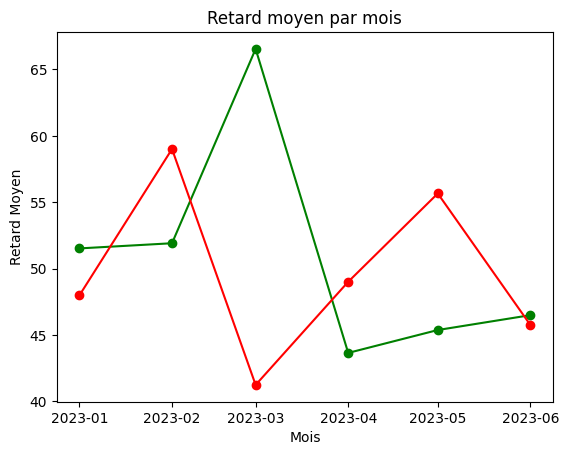

In [113]:
model = Prophet()
model.fit(train)

test_set["pred"] = model.predict(test_set[["ds"]])["yhat"]

test_set

plt.plot(test_set["ds"], test_set["y"], marker='o', linestyle='-', color='g')
plt.plot(test_set["ds"], test_set["pred"], marker='*', linestyle='-', color='r')
plt.xlabel('Mois')
plt.ylabel('Retard Moyen')
plt.title('Retard moyen par mois')
plt.show()

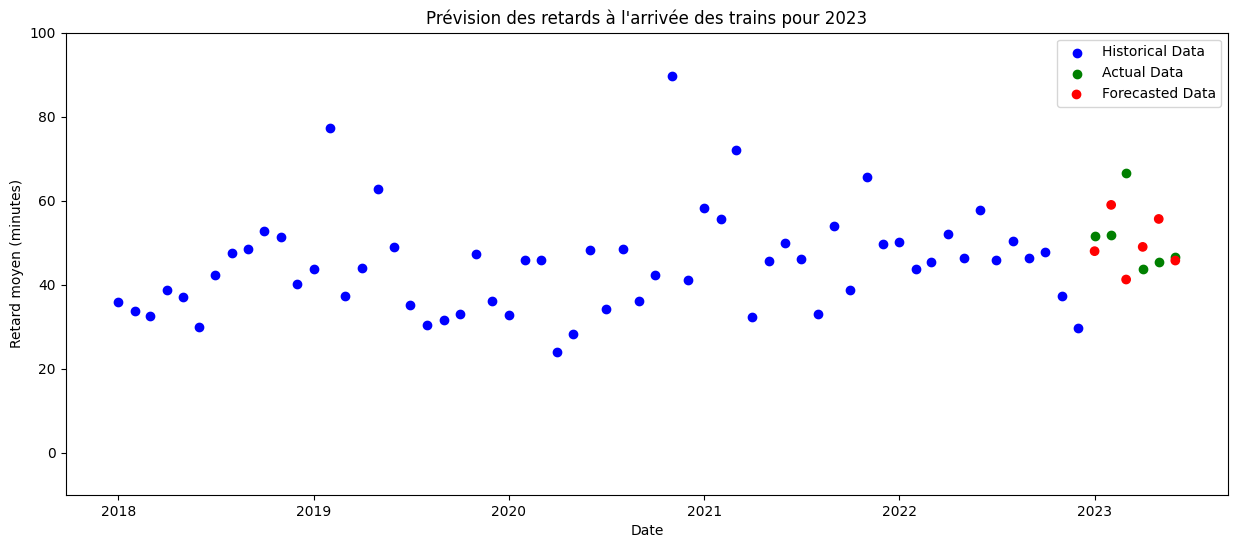

In [115]:
plt.figure(figsize=(15, 6))
plt.title("Prévision des retards à l'arrivée des trains pour 2023")
plt.xlabel("Date")
plt.ylabel("Retard moyen (minutes)")
# Set the y-axis limits to -100 to 100
plt.ylim(-10, 100)

# Plot historical data for comparison
plt.scatter(train_set['ds'], train_set['y'], color='blue', label='Historical Data', zorder=5)

# Plot test data (actual values for 2023)
plt.scatter(test_set['ds'], test_set['y'], color='green', label='Actual Data', zorder=5)

# Plot forecasted data for 2023 without lines between points
plt.scatter(test_set['ds'], test_set['pred'], color='red', label='Forecasted Data', marker='o', linestyle='', zorder=5)

plt.legend(loc='best')
plt.show()


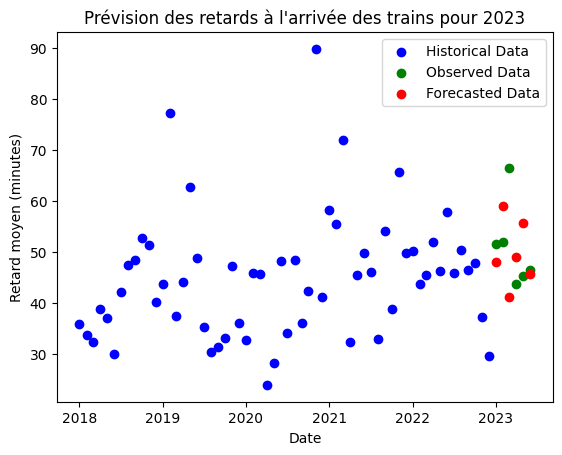

In [116]:
# Customize the plot
plt.title("Prévision des retards à l'arrivée des trains pour 2023")
plt.xlabel("Date")
plt.ylabel("Retard moyen (minutes)")

# Plot historical data for comparison
plt.scatter(train_set['ds'], train_set['y'], color='blue', label='Historical Data', zorder=5)

# Plot test data (actual values for 2023)
plt.scatter(test_set['ds'], test_set['y'], color='green', label='Observed Data', zorder=5)

# Plot forecasted data for 2023
plt.scatter(test_set['ds'], test_set['pred'], color='red', label='Forecasted Data', zorder=5)

# Show the legend
plt.legend(loc='best')
plt.show()

In [117]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for the forecast
mae = mean_absolute_error(test_set['y'], test_set['pred'])
print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")


Mean Absolute Error (MAE): 8.72 minutes


In [118]:
#étudier al cause du retard élevé le mois de mars 2023
# Filtrer les lignes où la colonne "date" est égale à "2023-03"
filtered_df = subset_df[subset_df["date"] == "2023-03"]

# Ensuite, sélectionner les colonnes spécifiques
causes = filtered_df[["date","prct_cause_prise_en_charge_voyageurs", "prct_cause_gestion_gare", "prct_cause_materiel_roulant", "prct_cause_gestion_trafic", "prct_cause_infra", "prct_cause_externe"]]
causes

,date,prct_cause_prise_en_charge_voyageurs,prct_cause_gestion_gare,prct_cause_materiel_roulant,prct_cause_gestion_trafic,prct_cause_infra,prct_cause_externe
7673,2023-03-01,4.347826,4.347826,4.347826,10.869565,41.304348,34.782609
